# Credit Card Fraud Detection

credit card fraud detection is important for safeguarding the financial industry, protecting customers, and maintaining trust and stability within the global economy. It is an ongoing challenge that requires continuous improvement in technology and security measures to stay ahead of fraudsters. Keeping customers money safe is primary job of any bank. Any fraud with credit card end up with loss to bank in terms of money, market reputation and customer trust.

## Dataset:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing


In [5]:
# Reading the dataset into dataframe
df = pd.read_csv("/Users/apple/Downloads/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Checking the shape of the data

df.shape

(284807, 31)

In [9]:
# Checking the description of the data 

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# Checking missing values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Distribution Analysis

In [12]:
classes = df['Class'].value_counts()
print(classes)

0    284315
1       492
Name: Class, dtype: int64


0 --> Legitimate Transaction

1 --> Fraud Transaction

## Our dataset is so imbalanced! Most of the transactions are non-fraud

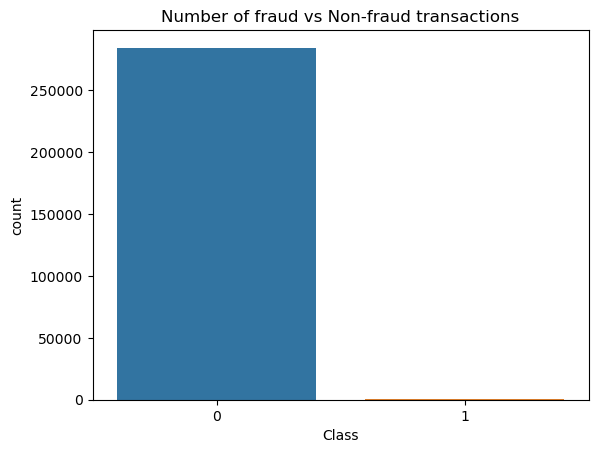

In [13]:
# Checking through boxplot

sns.countplot(x = 'Class', data = df)
plt.title('Number of fraud vs Non-fraud transactions')
plt.show()

## Outliers treatments 
we are not performing any outliers treatments for this particular dataset. because all the columns are already PCA trasformed, which assumed that the outlier values are taken care while transforming the data.

## Distribution of classes with time


In [16]:
# Creating fraud dataframe
data_fraud = df[df['Class'] == 1]

# Creating non-fraud dataframe
data_non_fraud = df[df['Class'] == 0]

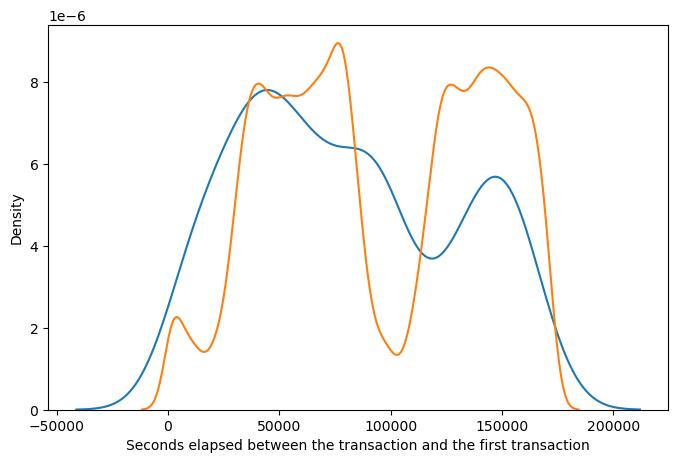

In [18]:
# Making a distribution plot

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'], label = 'Fraud', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label = 'Non Fraud', hist=False)
ax.set(xlabel = 'Seconds elapsed between the transaction and the first transaction')
plt.show()

## Analysis

We do not see any specific pattern for the fradulent and non-fraudulent transactions with respect to Time. Hence we can drop the Time column.

In [19]:
# droping the time column
df.drop('Time', axis = 1, inplace = True)

## Distribution of classes with amount

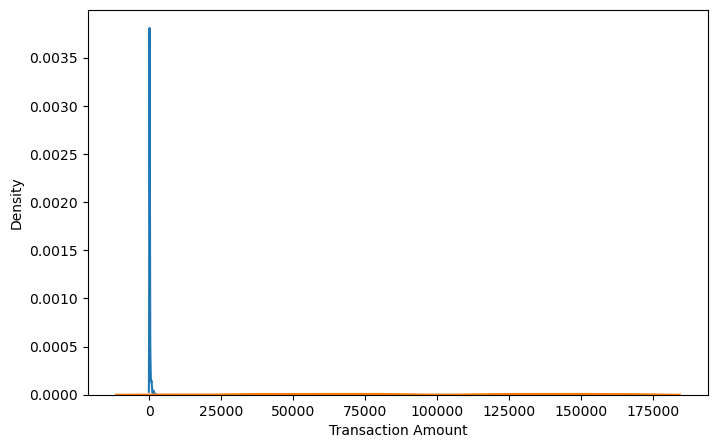

In [20]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'], label='Fradulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label = 'Non Fradulet', hist=False)
ax.set(xlabel='Transaction Amount')
plt.show()

## Analysis
We can see the fraud transactions are mostly densed in the lower range of amount, whereas the non-fraud transactions are throughout low to high range of amount.

# Train_Test_Split

In [21]:
# Importing library
from sklearn.model_selection import train_test_split

In [22]:
# putting feature variables into X
X = df.drop(['Class'], axis = 1)

In [24]:
# Putting target variable to y
y = df['Class']

## Splitting data into training and test set (80:20)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

# Feature Scalling

We need to scale only the Amount column as all other clumns are aleady scaled by PCA transaformation

In [26]:
# importing Standarization method
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the data into scaler and transformed
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [28]:
# Checking the head of X_rain trained 

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


# Models 

In [34]:
# importing metrics to check the performence for our each model

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [37]:
# predicting result 

results = pd.DataFrame(columns = ['Model Name', 'Accuracy', 'F1-score', 'ROC'])

In [56]:
# ROC Curve function

def draw_roc(actual, probs):
    fpr, tpr, threshold = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

## 1. Logistic Regression 

In [57]:
# Importing scikit Logistic regression module
from sklearn.linear_model import LogisticRegression

In [58]:
# Instantiate the model with best C

logistic = LogisticRegression(C=0.01)

In [65]:
# Fiting the model on the train set

logistic_model = logistic.fit(X_train, y_train)

In [70]:
# Prepare results function
def display_test_results(model_name, model):
    
    # Prediction on the test set
    y_test_pred = model.predict(X_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))
    
    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # Predicted probability
    y_test_pred_proba = model.predict_proba(X_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(y_test, y_test_pred_proba)

    # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

    return None

## Prediction results


------------------ Confusion Matrix --------------------
[[53563  3303]
 [   31    65]]


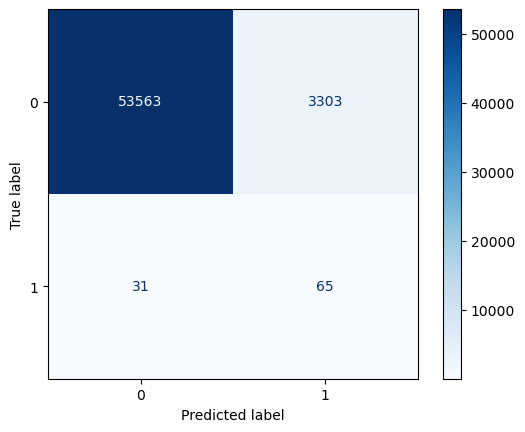

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.68      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.81      0.50     56962
weighted avg       1.00      0.94      0.97     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9414697517643341
Sensitivity:- 0.6770833333333334
Specificity:- 0.9419160834241902
F1-Score:- 0.037528868360277134
------------------ ROC --------------------


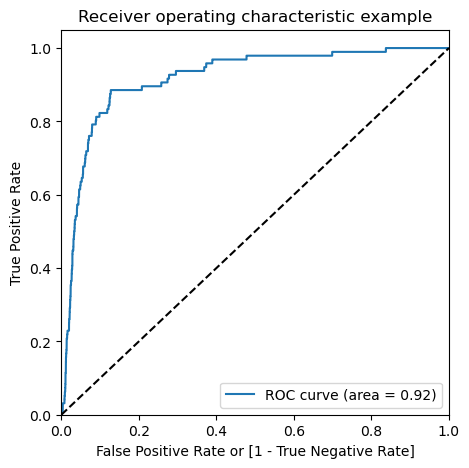

In [71]:
display_test_results('Logistic Regression', logistic_model)

# We can see that we have good ROC curve on the test set 0.92.

# XGBoost

In [78]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/1b/10/3c0635997d16a476dba4e3ab04ba47462cdef002e43bf3067395eac0a4e0/xgboost-2.0.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [79]:
# Importing XGBoost
from xgboost import XGBClassifier

In [83]:
params = {'learning_rate': 0.2,
         'max_depth': 2,
         'n_estimators': 200,
         'subsample': 0.9,
         'objective' : 'binary: logistic'}

In [84]:
# fit model on training data
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary: logistic', 'subsample': 0.9}, ...)

## prediction results

------------------ Confusion Matrix --------------------
[[56851    15]
 [   25    71]]


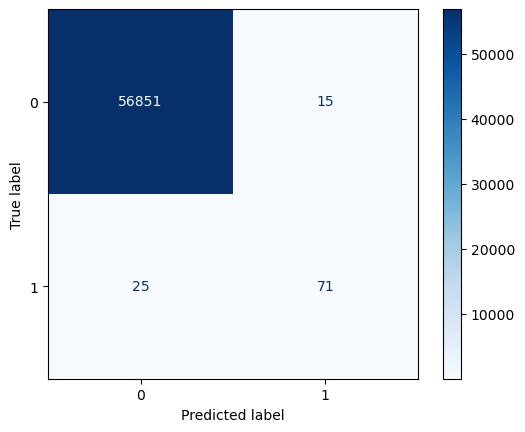

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.83      0.74      0.78        96

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9992977774656788
Sensitivity:- 0.7395833333333334
Specificity:- 0.9997362219955686
F1-Score:- 0.7802197802197802
------------------ ROC --------------------


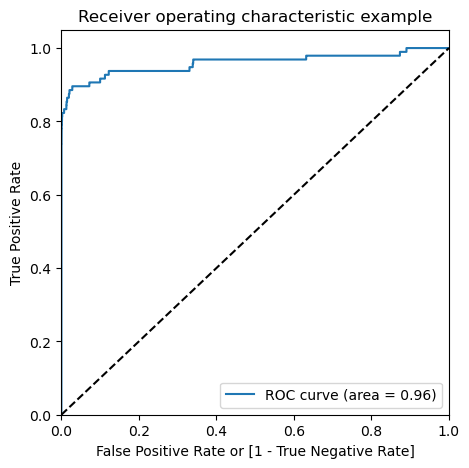

In [85]:
display_test_results("XG Boost", xgb_model)

## Decision Tree

In [86]:
# importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [88]:
# model with optimal hyperparameters

decision_tree_model = DecisionTreeClassifier(criterion = "gini", 
                                            random_state = 100, 
                                            max_depth = 5, 
                                            min_samples_leaf = 100,
                                            min_samples_split = 100)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

# Prediction result

------------------ Confusion Matrix --------------------
[[56836    30]
 [   40    56]]


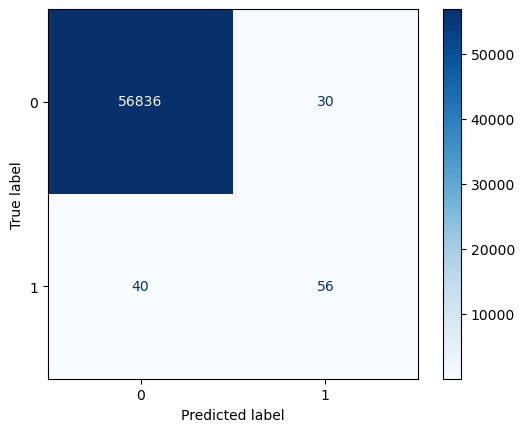

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.6153846153846155
------------------ ROC --------------------


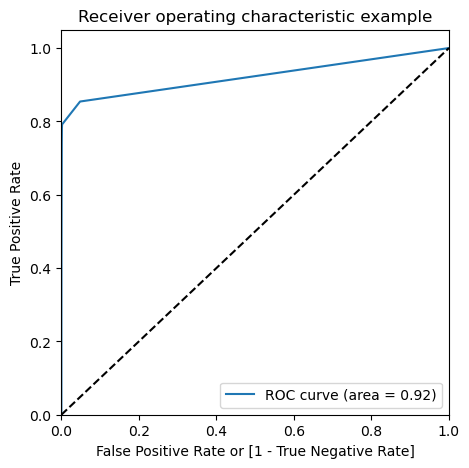

In [89]:
display_test_results("Decision Tree", decision_tree_model)

# Random forest

In [90]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
random_forest_model = RandomForestClassifier(bootstrap = True,
                                            max_depth = 5,
                                            min_samples_leaf = 50,
                                            min_samples_split = 50,
                                            max_features = 10,
                                            n_estimators = 100)


In [95]:
# fiting the model

random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

# Prediction results

------------------ Confusion Matrix --------------------
[[56841    25]
 [   36    60]]


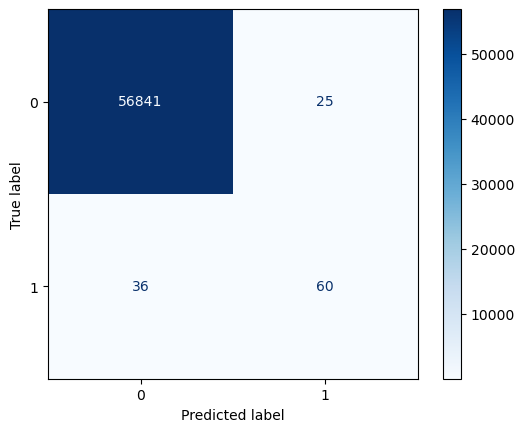

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.62      0.66        96

    accuracy                           1.00     56962
   macro avg       0.85      0.81      0.83     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9989291106351603
Sensitivity:- 0.625
Specificity:- 0.9995603699926142
F1-Score:- 0.6629834254143646
------------------ ROC --------------------


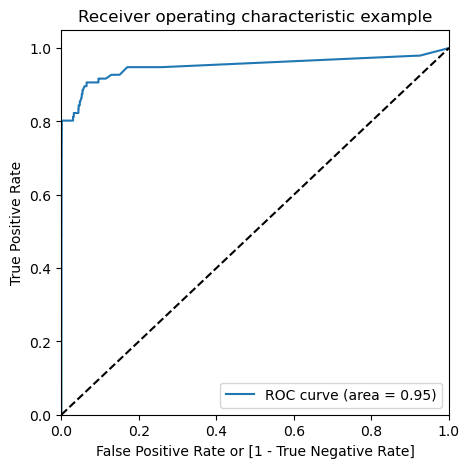

In [96]:
display_test_results("Random Forest", random_forest_model)

# Summary

In [98]:
results.sort_values(by = 'ROC', ascending = False)

,Model Name,Accuracy,F1-score,ROC
1,XG Boost,0.999298,0.780220,0.958973
3,Random Forest,0.998929,0.662983,0.950925
2,Decision Tree,0.998771,0.615385,0.921750
0,Logistic Regression,0.941470,0.037529,0.917804


Predictions and accuracies may be subjected to change. The main thing is to see if our models are able to correctly classify no fraud and fraud transactions.